# Course 03 - Gradient Descent

In this notebook, we will
- try to solve the Linear Regression problem using Gradient Descent

# 1. Gradient Descent

## Example

In [1]:
import os
module_path = os.path.abspath(os.path.join('..'))
print(module_path)

d:\Job\VinUni\Research Assistant\Teaching Assistant\2024 April\Machine learning\Code


In [2]:
import pandas as pd
df = pd.read_csv(os.path.join(module_path, "dataset", "House_Price.csv"))        # load file csv

In [3]:
df #investigate the dataframe

,Size in feet squared,Price in thousand dollar
0,2497,729
1,1627,617
2,576,290
3,2156,728
4,1154,453
...,...,...
95,579,207
96,1551,368
97,2243,514
98,803,372


Text(0, 0.5, 'Price in thousand dollar')

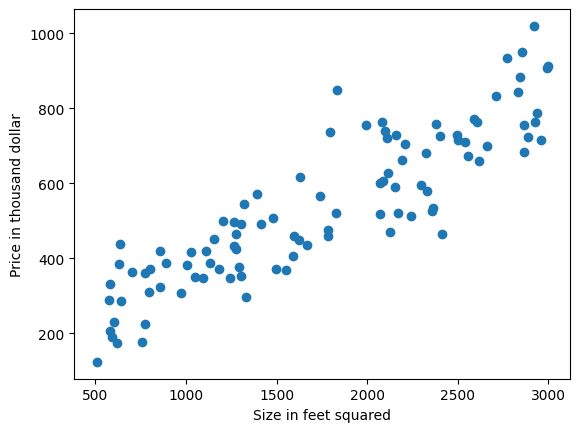

In [4]:
## plot the dataframe
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

Now we want to solve a problem based on the size of the house, estimating the price:

- $X$ = house size

- $y$ = price

Let $\hat{y} = w_1X + w_2$ be the prediction, where $a$ and $b$ are real-number parameters.

We find $w_1$ and $w_2$ such that the mean squared error is minimized, i.e., finding $w_1$ and $w_2$ such that

$$ \frac{1}{2N}\sum (y_i-\hat{y}_i)^2 = \sum (y_i - w_1x_i + w_2)^2 $$

reaches its minimum value.

In this problem, $x_i$ is the size of the $i$-th house, $y_i$ are the price of this house.

Let $\mathbf{w} = (w_1, w_2)$, and $\mathbf{X}$, $\mathbf{y}$ are matrices where each row of $\mathbf{X}$ is the size of a house, corresponding rows of $\mathbf{y}$ are the prices of those houses.

Let $\mathbf{Z}$ be the extended matrix of $\mathbf{X}$ with an additional column of all ones. The objective function can be re-written as

$$ \frac{1}{2N}\mathcal{L}\left(\mathbf{w}\right) = \left\lVert \mathbf{y}-\overline{\mathbf{Z}}\mathbf{w}\right\rVert^2_2.$$

Let $\lambda$ be the learning rate of the GD technique, $\mathbf{w}$ will be updated by

$$\mathbf{w} \leftarrow \mathbf{w}-\lambda \frac{\partial \mathcal{L}\left(\mathbf{w}\right)}{\partial \mathbf{w}} = \mathbf{w}-\frac{1}{2N}\lambda \overline{\mathbf{Z}}^\top\left(\overline{\mathbf{Z}}\mathbf{w}-\mathbf{y}\right).$$

In [46]:
import numpy as np

X = df['Size in feet squared'].values
X = X.reshape(-1, 1)
y = df['Price in thousand dollar'].values
y = y.reshape(-1,1)

Z = np.concatenate([X, np.ones((100,1))], axis=-1)   # add one column after X, then assign this new X into Z
Z = Z.astype(np.float64)                                 # convert it into float-number array

In [105]:
w = np.array([1.0, 100.0])           ## initiate
w = w.reshape(-1, 1)

n_iter = 10000           ## learning iterations
lmda = 0.000001          ## learning rate

loss_history = []
weights_history = []

for ii in range(n_iter):

    error = np.matmul(Z, w) - y

    gradient = np.matmul(Z.T, error) / (2*Z.shape[0]) #calculate the gradient value
    w = w - lmda *gradient

    loss_history.append(np.linalg.norm(y-np.matmul(Z, w))**2)
    weights_history.append(w.copy())

    if ii % 1000 == 0:
        loss = np.linalg.norm(y-np.matmul(Z, w))**2
        print("Loss at iter {}: {}".format(ii, loss))
        
loss = np.linalg.norm(y-np.matmul(Z, w))**2
print("Final loss: ", loss)

Loss at iter 0: 136457549.23324412
Loss at iter 1000: 865054.8700700417
Loss at iter 2000: 865052.8558807396
Loss at iter 3000: 865050.8420086872
Loss at iter 4000: 865048.828453834
Loss at iter 5000: 865046.8152161307
Loss at iter 6000: 865044.8022955267
Loss at iter 7000: 865042.7896919724
Loss at iter 8000: 865040.7774054179
Loss at iter 9000: 865038.7654358135
Final loss:  865036.755794603


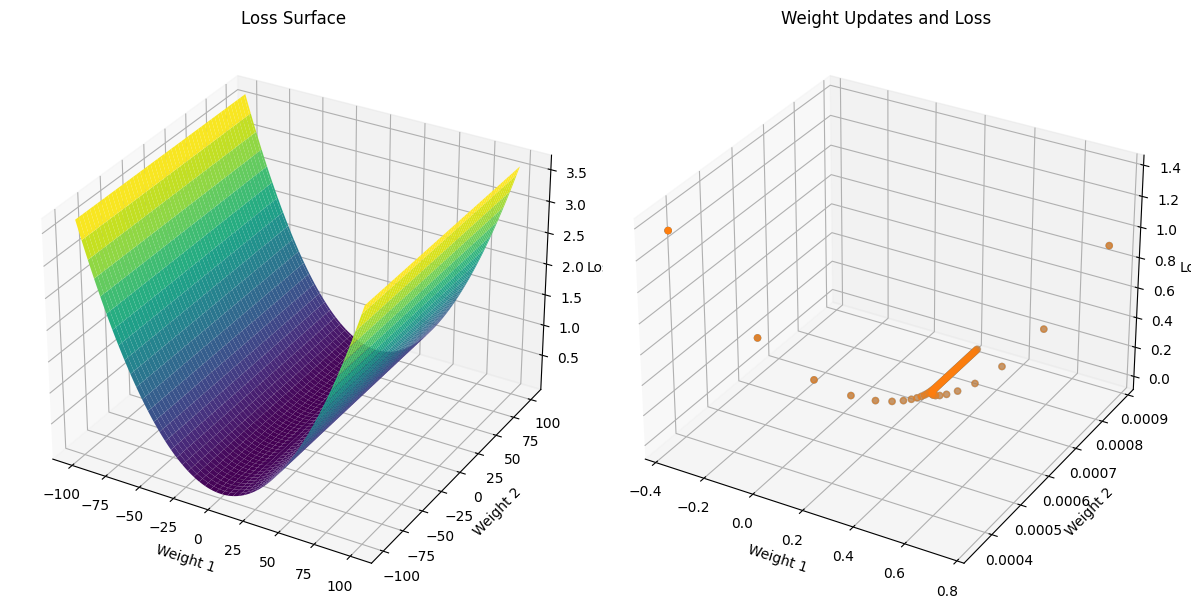

In [113]:
# Plot loss surface
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1, projection='3d')

loss_history = np.array(loss_history)
weights_history = np.array(weights_history)


# Generate weight values for plotting
w0_vals = np.linspace(-100, 100, 100)
w1_vals = np.linspace(-100, 100, 100)
w0_vals, w1_vals = np.meshgrid(w0_vals, w1_vals)
losses = np.zeros_like(w0_vals)
for i in range(len(w0_vals)):
    for j in range(len(w1_vals)):
        w = np.array([w0_vals[i, j], w1_vals[i, j]])
        losses[i, j] = np.linalg.norm(y-np.matmul(Z, w))**2
ax.plot_surface(w0_vals, w1_vals, losses, cmap='viridis', edgecolor='none')
ax.set_title('Loss Surface')
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Loss')

#Plot weight updates


ax = fig.add_subplot(1, 2, 2, projection='3d')

weights_history_0 = np.array([i[0] for i in weights_history[:, 0]])
weights_history_1 = np.array([i[0] for i in weights_history[:, 1]])

l=len(weights_history_0)

for i in range(Z.shape[1]):
    ax.scatter(weights_history_0[:100], weights_history_1[:100], loss_history[:100], marker='o', label=f'Weight {i+1}')
ax.set_title('Weight Updates and Loss')
ax.set_xlabel('Weight 1')
ax.set_ylabel('Weight 2')
ax.set_zlabel('Loss')


plt.tight_layout()
plt.show()

In [7]:
print("Solution by GD:", w)
w_exact = np.matmul(np.matmul(np.linalg.pinv(np.matmul(Z.T,Z)), Z.T), y)
print("Solution by Exact:", w_exact)

Solution by GD: [[  0.24853296]
 [100.02207152]]
Solution by Exact: [[  0.23481102]
 [128.4945004 ]]


Text(0, 0.5, 'Price in thousand dollar')

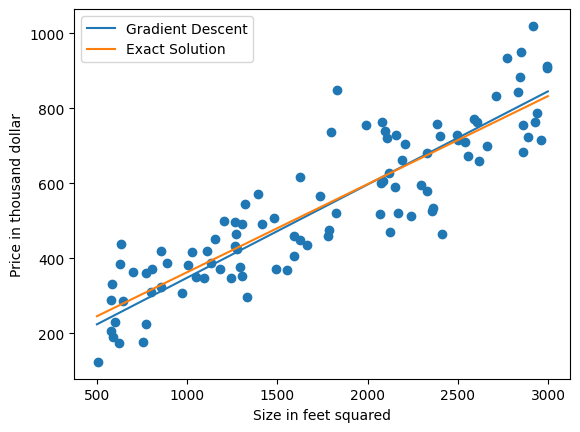

In [8]:
# plot the regression line
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), w[0]*np.arange(500, 3000) + w[1], label = "Gradient Descent")
plt.plot(np.arange(500, 3000), w_exact[0]*np.arange(500, 3000) + w_exact[1], label = "Exact Solution")
plt.legend()
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

## Absolute objective function

We find $w_1$ and $w_2$ such that the absolute objective function is minimized, i.e., finding $w_1$ and $w_2$ such that

$$ \frac{1}{N}\sum \left|y_i-\hat{y}_i\right| = \frac{1}{N}\sum \left|y_i - w_1x_i - w_2\right|$$

reaches its minimum value.

Note that, for $f\left(x\right)=\left|x\right|$, we have
- If $x_0 > 0$, $\frac{\partial f}{\partial x}\left(x_0\right)=\lim_{h\to0}\frac{f\left(x_0+h\right)-f\left(x_0\right)}{h}=\frac{x_0+h-x_0}{h}=1 = \text{sign}\left(x_0\right)$.
- If $x_0 < 0$, $\frac{\partial f}{\partial x}\left(x_0\right)=\lim_{h\to0}\frac{f\left(x_0+h\right)-f\left(x_0\right)}{h}=\frac{-x_0-h+x_0}{h}=-1 = \text{sign}\left(x_0\right)$.

Therefore, we can update the weights by the sign of the input. Specifically,
$$ g_1 = \frac{1}{N}\sum_{i=1}^N x_i\text{sign} \left(Z_i\mathbf{w}-y_i\right), \quad g_2 = \frac{1}{N}\sum_{i=1}^N \text{sign} \left(Z_i\mathbf{w}-y_i\right)$$
$$w_1 \leftarrow w_1 -\lambda g_1,$$
$$w_2 \leftarrow w_2 -\lambda g_2.$$

See [subgradient](https://cds.nyu.edu/wp-content/uploads/2021/05/subgradients_handout.pdf) for more.

In [ ]:
import numpy as np

# w = np.array([1.0, 100.0])           ## initiate
# w = w.reshape(-1, 1)

w_1 = 1.0
w_2 = 100.0


n_iter = 10000           ## learning iterations
lmda = 0.0000001          ## learning rate
for ii in range(n_iter):

    # abs_error = np.matmul(Z, w) - y
    # subgradient = np.matmul(Z.T, np.sign(abs_error))
    # subgradient = np.matmul(Z.T, np.matmul(Z, w) - y)

    w = np.array([w_1, w_2])
    w = w.reshape(-1, 1)

    g_1 = np.matmul(X.T, np.sign(np.matmul(Z, w)-y)) / len(y)
    g_2 = np.mean(np.sign(np.matmul(Z, w)-y))
    # print("g_1", g_1)
    # print("g_2", g_2)
    w_1 = w_1 - lmda*float(g_1)
    w_2 = w_2 - lmda*g_2

    # subgradient = np.mean(np.sign(np.matmul(Z, w)-y))
    # w = w - lmda * np.sign(subgradient)

    if ii % 1000 == 0:
        loss = np.mean(np.absolute(np.matmul(Z, w)-y))
        # loss = np.mean(abs_error)
        print("Loss at iter {}: {}".format(ii, loss))

w = np.array([w_1, w_2])
w = w.reshape(-1, 1)

loss = np.mean(np.absolute(np.matmul(Z, w)-y))
print("Final loss: ", loss)

<ipython-input-65-517d00a3779c>:25: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  w_1 = w_1 - lmda*float(g_1)


Loss at iter 0: 1309.14
Loss at iter 1000: 1003.5510427899142
Loss at iter 2000: 697.9620855798285
Loss at iter 3000: 393.8075206116121
Loss at iter 4000: 123.61593453153723
Loss at iter 5000: 76.3713151170619
Loss at iter 6000: 76.05665109333795
Loss at iter 7000: 76.05663263836372
Loss at iter 8000: 76.05665286923796
Loss at iter 9000: 76.05663265073797
Final loss:  76.05665464513795


In [ ]:
w

array([[ 0.24941213],
       [99.99960727]])

In [ ]:
print("Solution by Subgradient Descent:", w)
w_exact = np.matmul(np.matmul(np.linalg.pinv(np.matmul(Z.T,Z)), Z.T), y)
print("Solution by Exact:", w_exact)

Solution by Subgradient Descent: [[ 0.24941213]
 [99.99960727]]
Solution by Exact: [[  0.23481102]
 [128.4945004 ]]


Text(0, 0.5, 'Price in thousand dollar')

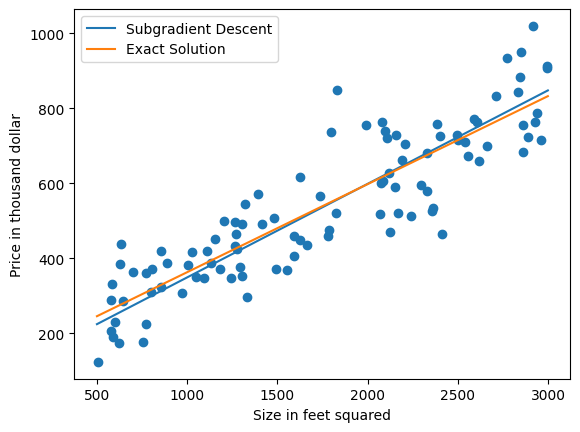

In [ ]:
# plot the regression line
import matplotlib.pyplot as plt
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), w[0]*np.arange(500, 3000) + w[1], label = "Subgradient Descent")
plt.plot(np.arange(500, 3000), w_exact[0]*np.arange(500, 3000) + w_exact[1], label = "Exact Solution")
plt.legend()
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

## Momentum Gradient Descent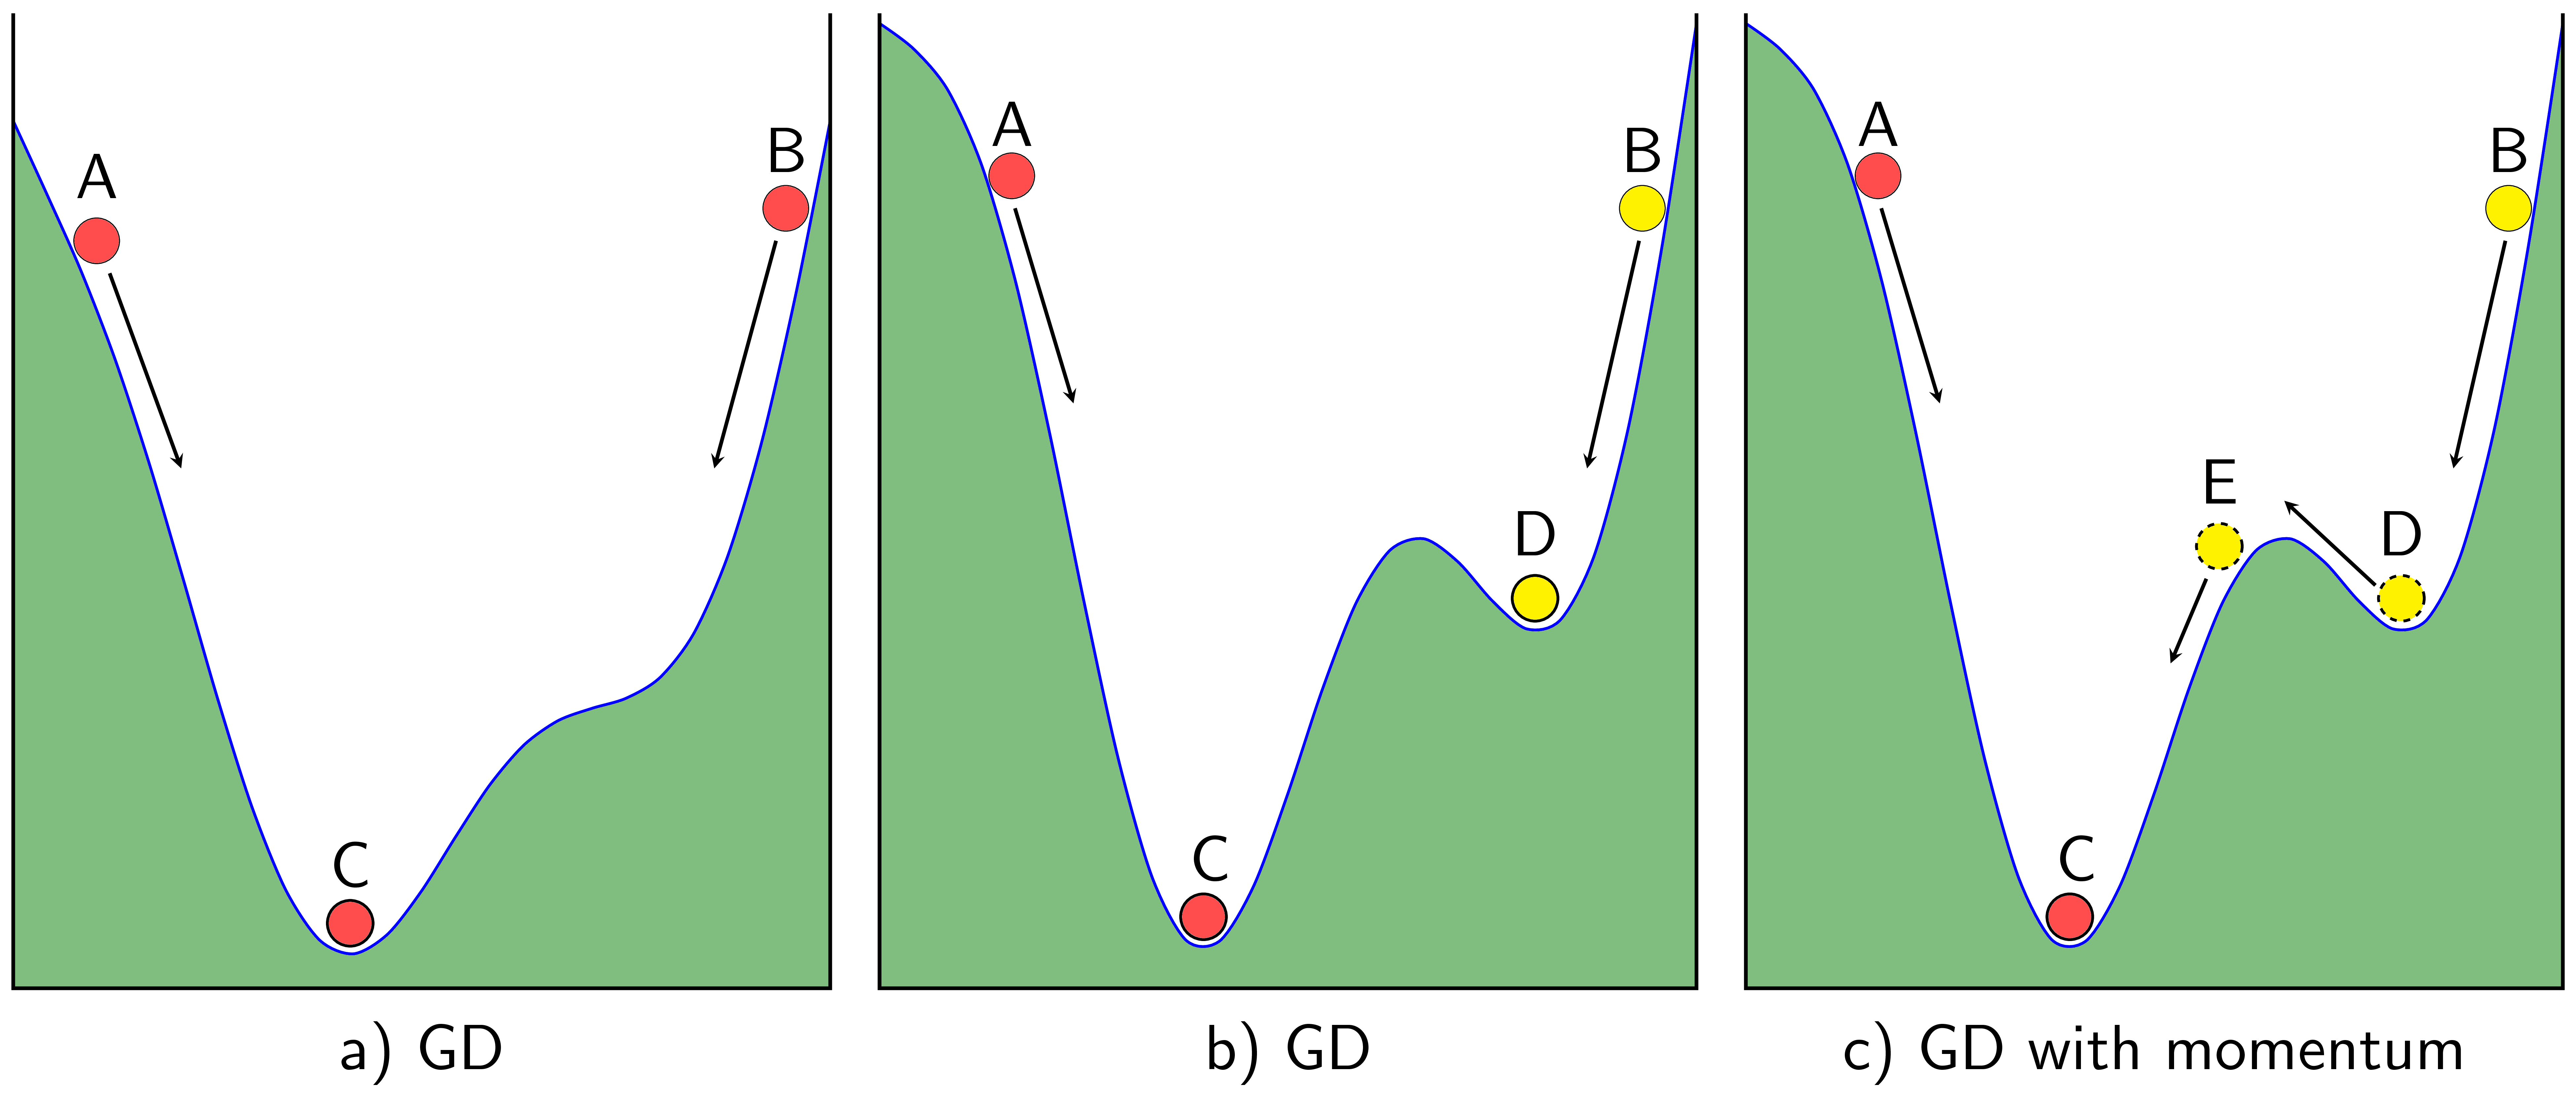

We want to speed the point up, i.e., at the time $t$, we want to change our value with an adjustable velocity $v_t$ by
$$x_{t+1} = x_t-v_t.$$
This velocity contains information about the gradient update as well as the momentum of the previous velocity, i.e.,
$$v_t = \alpha v_{t-1}+\eta \nabla \mathcal{L}.$$

In [114]:
w = np.array([1.0, 100.0])           ## initiate
w = w.reshape(-1, 1)

n_iter = 10000           ## learning iterations
lmda = 0.000001          ## learning rate
gamma = 0.9
v = np.zeros_like(w)

for ii in range(n_iter):
    gradient = np.matmul(Z.T, np.matmul(Z, w) - y) / (2*Z.shape[0]) #calculate the gradient value
    v = gamma * v + lmda * gradient
    w = w - v
    if ii % 1000 == 0:
        loss = np.linalg.norm(y-np.matmul(Z, w))**2
        print("Loss at iter {}: {}".format(ii, loss))
loss = np.linalg.norm(y-np.matmul(Z, w))**2
print("Final loss: ", loss)
print("Solution by GD:", w)

Loss at iter 0: 136457549.23324412
Loss at iter 1000: 865036.9165688045
Loss at iter 2000: 865016.8170545759
Loss at iter 3000: 864996.7491763544
Loss at iter 4000: 864976.7128843457
Loss at iter 5000: 864956.7081288334
Loss at iter 6000: 864936.7348601813
Loss at iter 7000: 864916.7930288296
Loss at iter 8000: 864896.8825852965
Loss at iter 9000: 864877.0034801796
Final loss:  864857.1754963557
Solution by GD: [[  0.24843614]
 [100.22298274]]


In [115]:
w_exact = np.matmul(np.matmul(np.linalg.pinv(np.matmul(Z.T,Z)), Z.T), y)
print("Solution by Exact:", w_exact)

Solution by Exact: [[  0.23481102]
 [128.4945004 ]]


Text(0, 0.5, 'Price in thousand dollar')

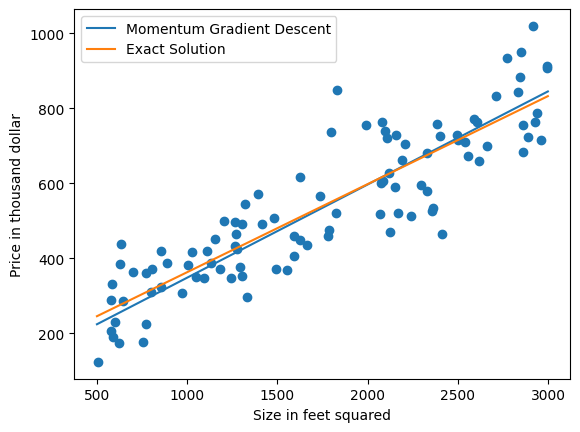

In [116]:
# plot the regression line
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), w[0]*np.arange(500, 3000) + w[1], label = "Momentum Gradient Descent")
plt.plot(np.arange(500, 3000), w_exact[0]*np.arange(500, 3000) + w_exact[1], label = "Exact Solution")
plt.legend()
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

## Stochastic Gradient Descent

write something about SGD

In [117]:
# stochastic gradient descent

import matplotlib.pyplot as plt
import numpy as np
w = np.array([1.0, 100.0])           ## initiate
w = w.reshape(-1, 1)

n_iter = 10000           ## learning iterations
lmda = 0.0000001          ## learning rate
for ii in range(n_iter):
    # Pick a random sample
    idx = np.random.randint(len(y))
    X_sample = X[idx:idx+1]
    y_sample = y[idx:idx+1]
    Z_sample = np.concatenate([X_sample, np.ones((1,1))], axis=-1)   # add one column after X, then assign this new X into Z
    Z_sample = Z_sample.astype(np.float64)                                 # convert it into float-number array

    gradient = np.matmul(Z_sample.T, np.matmul(Z_sample, w) - y_sample) / (2*Z_sample.shape[0]) #calculate the gradient value
    w = w - lmda *gradient
    if ii % 1000 == 0:
        loss = np.linalg.norm(y-np.matmul(Z, w))**2
        print("Loss at iter {}: {}".format(ii, loss))

loss = np.linalg.norm(y-np.matmul(Z, w))**2
print("Final loss: ", loss)
print("Solution by Stochastic GD:", w)

Loss at iter 0: 142905559.71676767
Loss at iter 1000: 924224.7840448732
Loss at iter 2000: 874799.2276983177
Loss at iter 3000: 880462.43509965
Loss at iter 4000: 1212888.599695047
Loss at iter 5000: 966304.3647356043
Loss at iter 6000: 882972.6869321293
Loss at iter 7000: 1072445.1540395077
Loss at iter 8000: 1015311.8256863345
Loss at iter 9000: 865681.8275532478
Final loss:  874313.012139956
Solution by Stochastic GD: [[  0.2535948 ]
 [100.00191446]]


In [118]:
#exact solution

print("Solution by Exact:", w_exact)
w_exact = np.matmul(np.matmul(np.linalg.pinv(np.matmul(Z.T,Z)), Z.T), y)

Solution by Exact: [[  0.23481102]
 [128.4945004 ]]


Text(0, 0.5, 'Price in thousand dollar')

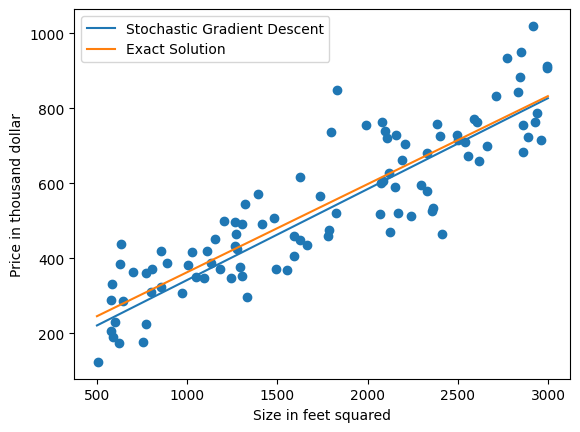

In [ ]:
# plot the regression line
plt.scatter(df["Size in feet squared"], df["Price in thousand dollar"])
plt.plot(np.arange(500, 3000), w[0]*np.arange(500, 3000) + w[1], label = "Stochastic Gradient Descent")
plt.plot(np.arange(500, 3000), w_exact[0]*np.arange(500, 3000) + w_exact[1], label = "Exact Solution")
plt.legend()
plt.xlabel("Size in feet squared")
plt.ylabel("Price in thousand dollar")

## Exercise

Given a dataframe containing 100 rows that include width, length and price values of houses. We will build a model predicting a house's price based on width and length as follow:
$$ \text{price} = a * \text{width} + b* \text{length} + c, \quad a, b, c \in \mathbb{R}$$
- Use Gradient Descent to solve the Linear Regression problem.
  - Initiate suitable parameter values, iterations and learning rates.
  - To make Gd converges faster, normalize the dataframe before building the model.
- Compare the finding with Exact Solution and Sklearn's.